In [71]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC

x_train = pd.read_pickle('x_train.plk')
y_train = pd.read_pickle('y_train.plk')

x_valid = pd.read_pickle('x_valid.plk')
y_valid = pd.read_pickle('y_valid.plk')

x_train = x_train.drop('PassengerId', axis=1)
# y_train = y_train.drop('PassengerId', axis=1)
x_valid = x_valid.drop('PassengerId', axis=1)
# y_valid = y_valid.drop('PassengerId', axis=1)

In [72]:
from  sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train.head(10)

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
298,0,29.699118,0,0,30.5000,0,0,1,1,0,0
884,0,25.000000,0,0,7.0500,0,0,1,0,0,1
247,1,24.000000,0,2,14.5000,0,0,1,0,1,0
478,0,22.000000,0,0,7.5208,0,0,1,0,0,1
305,0,0.920000,1,2,151.5500,0,0,1,1,0,0
316,1,24.000000,1,0,26.0000,0,0,1,0,1,0
2,1,26.000000,0,0,7.9250,0,0,1,0,0,1
405,0,34.000000,1,0,21.0000,0,0,1,0,1,0
742,1,21.000000,2,2,262.3750,1,0,0,1,0,0
260,0,29.699118,0,0,7.7500,0,1,0,0,0,1


In [73]:
x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,29.476233,0.553892,0.372754,32.179397,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,13.009962,1.185279,0.795588,51.604012,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.925000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.400000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,30.500000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
cols_for_scale = ['Age','SibSp','Parch','Fare']

In [75]:
x_train[cols_for_scale] = scaler.fit_transform(x_train[cols_for_scale])

In [76]:
x_train.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
298,0,0.367921,0.000,0.000000,0.059532,0,0,1,1,0,0
884,0,0.308872,0.000,0.000000,0.013761,0,0,1,0,0,1
247,1,0.296306,0.000,0.333333,0.028302,0,0,1,0,1,0
478,0,0.271174,0.000,0.000000,0.014680,0,0,1,0,0,1
305,0,0.006283,0.125,0.333333,0.295806,0,0,1,1,0,0


In [77]:
x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,0.365120,0.069237,0.062126,0.062810,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,0.163483,0.148160,0.132598,0.100724,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.271174,0.000000,0.000000,0.015469,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.367921,0.000000,0.000000,0.028107,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.125000,0.000000,0.059532,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
x_valid[cols_for_scale] = scaler.transform(x_valid[cols_for_scale])

In [83]:
x_valid.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.00000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.381166,-0.000549,0.006726,0.011335,0.000123,0.22870,0.085202,0.686099,0.286996,0.192825,0.520179
std,0.486766,0.002050,0.012526,0.023275,0.000166,0.42094,0.279810,0.465121,0.453377,0.395404,0.500717
min,0.000000,-0.005213,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.001712,0.000000,0.000000,0.000030,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-0.000654,0.000000,0.000000,0.000058,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000341,0.015625,0.027778,0.000119,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,0.005867,0.062500,0.138889,0.001000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
import joblib

In [91]:
joblib.dump(scaler, 'min_max_scaler.pkl')

['min_max_scaler.pkl']

In [94]:
joblib.load('min_max_scaler.pkl')

MinMaxScaler()

In [97]:
clf = SVC()

In [99]:
clf.fit(x_train, y_train)

SVC()

In [101]:
y_pred = clf.predict(x_valid)

In [103]:
y_pred_train = clf.predict(x_train)

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(y_valid, y_pred)

0.8071748878923767

In [107]:
accuracy_score(y_train, y_pred_train)

0.8158682634730539

In [114]:
c_vals = np.logspace(-2, 2, 29)
c_vals

array([1.00000000e-02, 1.38949549e-02, 1.93069773e-02, 2.68269580e-02,
       3.72759372e-02, 5.17947468e-02, 7.19685673e-02, 1.00000000e-01,
       1.38949549e-01, 1.93069773e-01, 2.68269580e-01, 3.72759372e-01,
       5.17947468e-01, 7.19685673e-01, 1.00000000e+00, 1.38949549e+00,
       1.93069773e+00, 2.68269580e+00, 3.72759372e+00, 5.17947468e+00,
       7.19685673e+00, 1.00000000e+01, 1.38949549e+01, 1.93069773e+01,
       2.68269580e+01, 3.72759372e+01, 5.17947468e+01, 7.19685673e+01,
       1.00000000e+02])

In [115]:
accuracy_valid = []
accuracy_train = []
for val in c_vals:
    clf = SVC(C=val)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)

    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train,y_pred_train)

    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print('C={} \n\tacc_valid = {} \n\tacc_train = {}'.format(val, acc_valid, acc_train))

C=0.01 
	acc_valid = 0.600896860986547 
	acc_train = 0.6212574850299402
C=0.013894954943731374 
	acc_valid = 0.600896860986547 
	acc_train = 0.6212574850299402
C=0.019306977288832496 
	acc_valid = 0.600896860986547 
	acc_train = 0.6212574850299402
C=0.02682695795279726 
	acc_valid = 0.7757847533632287 
	acc_train = 0.7859281437125748
C=0.0372759372031494 
	acc_valid = 0.7802690582959642 
	acc_train = 0.7889221556886228
C=0.0517947467923121 
	acc_valid = 0.7847533632286996 
	acc_train = 0.7979041916167665
C=0.07196856730011521 
	acc_valid = 0.8071748878923767 
	acc_train = 0.812874251497006
C=0.1 
	acc_valid = 0.8071748878923767 
	acc_train = 0.812874251497006
C=0.13894954943731375 
	acc_valid = 0.8071748878923767 
	acc_train = 0.812874251497006
C=0.19306977288832497 
	acc_valid = 0.8071748878923767 
	acc_train = 0.812874251497006
C=0.2682695795279725 
	acc_valid = 0.8071748878923767 
	acc_train = 0.812874251497006
C=0.372759372031494 
	acc_valid = 0.8071748878923767 
	acc_train = 0.812

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format ='svg'

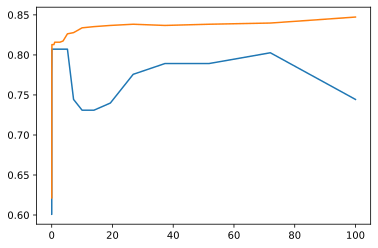

In [117]:
plt.plot(c_vals,accuracy_valid)
plt.plot(c_vals, accuracy_train)